From the vidoe: https://www.youtube.com/watch?v=7FP7ndMEfsc

In [37]:
import cv2
import scipy
import numpy as np
import scipy.signal
import scipy.ndimage
import matplotlib.pyplot as plt

In [38]:
img = cv2.imread("tests/test_image.jpg",0)

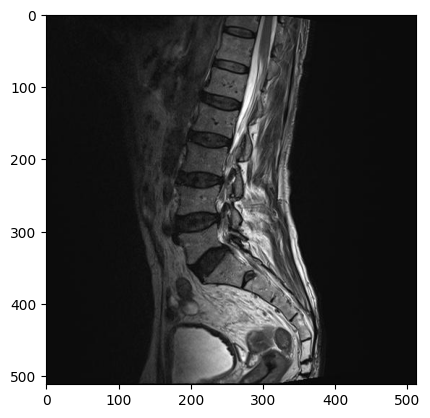

In [39]:
plt.imshow(img, cmap='gray')

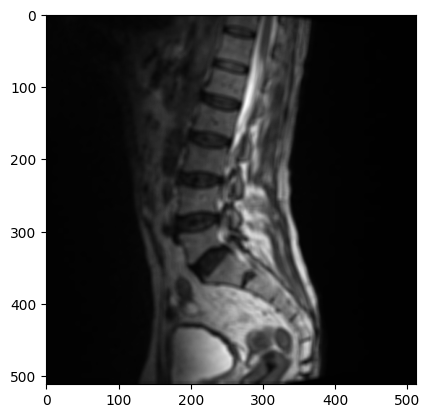

In [40]:
# gassuan filter via cv2
plt.imshow(cv2.GaussianBlur(img, (7,7),5), cmap='gray')

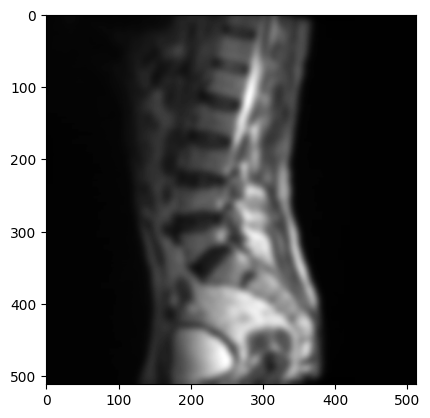

In [41]:
# gaussian filter
gf_img = scipy.ndimage.gaussian_filter(img, sigma=5)
plt.imshow(gf_img, cmap='gray')

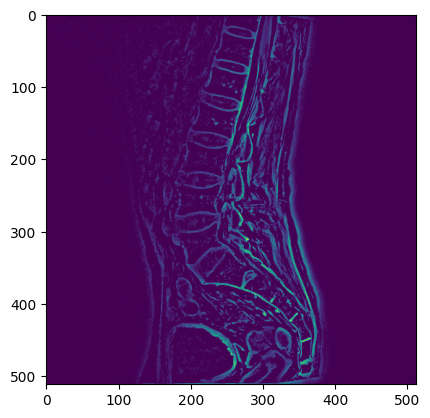

In [42]:
plt.imshow(cv2.subtract(gf_img, img))

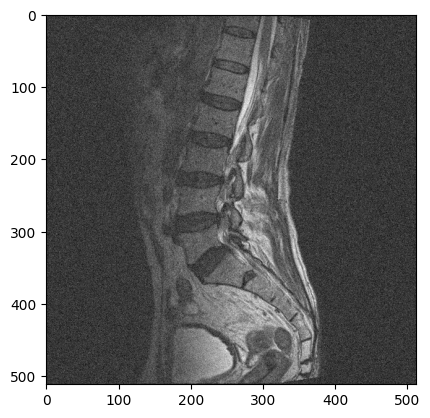

In [43]:
# adding noise to the image
mean = 100
stddev = 20
noise = np.random.normal(mean, stddev, img.shape)
noisy_img = img + noise

plt.imshow(noisy_img, cmap='gray')

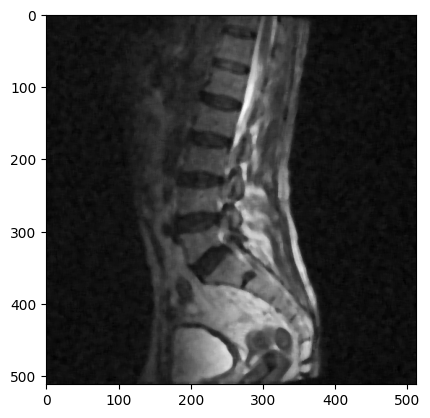

In [44]:
# median filter: for noise removal, salt and pepper noise
mf_img = scipy.ndimage.median_filter(noisy_img, size=7)
plt.imshow(mf_img, cmap='gray')

In [50]:
noisy_img.dtype

dtype('float64')

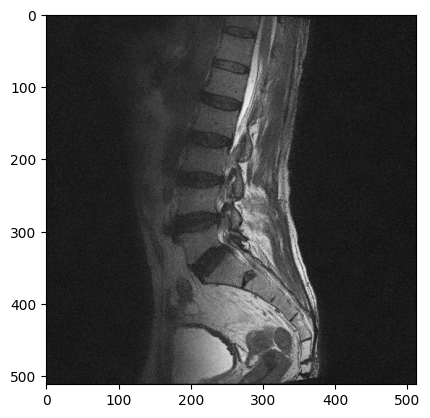

In [71]:
# bilateral filter, a better image filter for noise reduction

bilateral_img = cv2.bilateralFilter(noisy_img.astype(np.float32), 30,30,30)
plt.imshow(bilateral_img, cmap='gray')

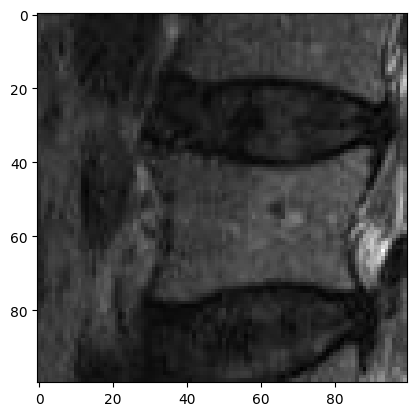

In [74]:
# cross correlation with cv2
template = img[200:300,150:250]
plt.imshow(template, cmap='gray')

In [75]:

result = cv2.matchTemplate(img, template, cv2.TM_CCORR_NORMED)

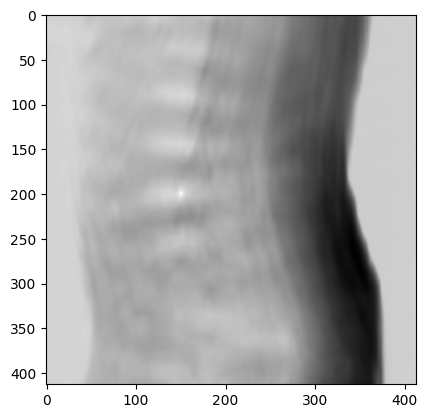

In [80]:
# the maxium point of brightness is the most correlated point of the template
plt.imshow(result, cmap='gray')

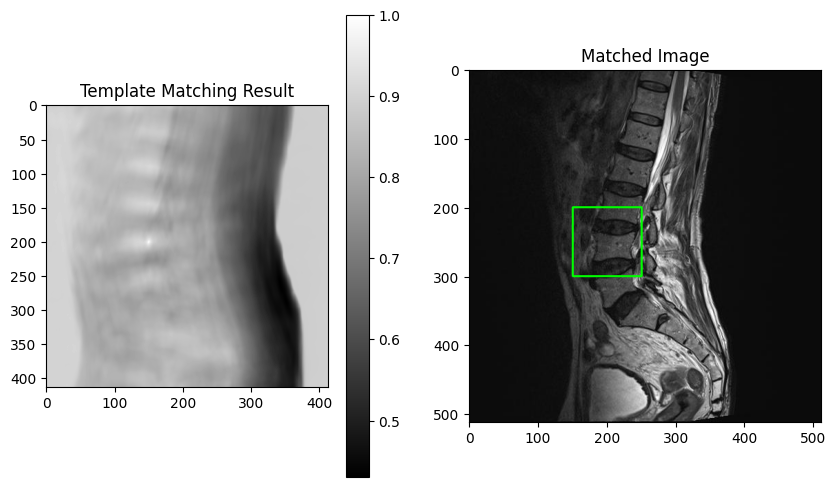

In [81]:
in_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Top-left corner of the matched region
top_left = max_loc

# Draw a rectangle around the matched region on the original image
bottom_right = (top_left[0] + template.shape[0], top_left[1] + template.shape[1])
matched_image = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert to color for visualization
cv2.rectangle(matched_image, top_left, bottom_right, (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('Template Matching Result')
plt.imshow(result, cmap='gray')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('Matched Image')
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))
plt.show()

#### Butterworth Filter in frequency domain
Some good examples and usage of the Butterworth filter is given here:
https://scikit-image.org/docs/stable/auto_examples/filters/plot_butterworth.html